In [1]:
import os, shutil

In [2]:
base_dir = '/home/skhatter/Damage_Detection_New'
train_dir = '/home/skhatter/Damage_Detection_New/train'
valid_dir = '/home/skhatter/Damage Detection/validation'
test_dir = '/home/skhatter/Damage Detection/test'

train_dam_dir = '/home/skhatter/Damage_Detection_New/train/damaged'
train_undam_dir = '/home/skhatter/Damage_Detection_New/train/undamaged'

valid_dam_dir = '/home/skhatter/Damage Detection/validation/damaged'
valid_undam_dir = '/home/skhatter/Damage Detection/validation/undamaged'

test_dir = '/home/skhatter/Damage Detection/test'

In [3]:
print('Total training damaged images', len(os.listdir(train_dam_dir)))
print('Total training undamaged images', len(os.listdir(train_undam_dir)))

print('Total validation damaged images', len(os.listdir(valid_dam_dir)))
print('Total validation undamaged images', len(os.listdir(valid_undam_dir)))

print('Total test damaged images', len(os.listdir(test_dir)))

Total training damaged images 100
Total training undamaged images 294
Total validation damaged images 10
Total validation undamaged images 21
Total test damaged images 2


In [4]:
from keras import layers
from keras import models
from keras.applications import VGG16

Using TensorFlow backend.


In [5]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape=(512,512,3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0         
__________

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 5

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,16,16,512 ))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(512,512),
                                           batch_size=batch_size, class_mode='binary')
    i =0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 394)
validation_features, validation_labels = extract_features(valid_dir, 31)
#test_features, test_labels = extract_features(test_dir, 2)        

Found 394 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [7]:
train_features = np.reshape(train_features, (394, 16*16*512))
validation_features = np.reshape(validation_features, (31, 16*16*512))

In [8]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=16*16*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

In [9]:
history = model.fit(train_features, train_labels, epochs=100, 
                    batch_size =5, 
                    validation_data=(validation_features, validation_labels))

Train on 394 samples, validate on 31 samples
Epoch 1/100
394/394 [==============================] - 1s - loss: 1.2712 - acc: 0.6396 - val_loss: 0.6129 - val_acc: 0.6774
Epoch 2/100
394/394 [==============================] - 1s - loss: 0.6158 - acc: 0.7284 - val_loss: 0.5916 - val_acc: 0.6774
Epoch 3/100
394/394 [==============================] - 1s - loss: 0.4973 - acc: 0.7716 - val_loss: 0.6986 - val_acc: 0.6774
Epoch 4/100
394/394 [==============================] - 1s - loss: 0.4257 - acc: 0.8147 - val_loss: 0.6146 - val_acc: 0.6774
Epoch 5/100
394/394 [==============================] - 1s - loss: 0.3923 - acc: 0.8401 - val_loss: 0.8752 - val_acc: 0.6774
Epoch 6/100
394/394 [==============================] - 1s - loss: 0.3418 - acc: 0.8579 - val_loss: 0.8181 - val_acc: 0.6774
Epoch 7/100
394/394 [==============================] - 1s - loss: 0.3363 - acc: 0.8579 - val_loss: 0.7689 - val_acc: 0.7097
Epoch 8/100
394/394 [==============================] - 1s - loss: 0.2814 - acc: 0.8807 

394/394 [==============================] - 1s - loss: 0.0027 - acc: 1.0000 - val_loss: 3.2641 - val_acc: 0.7097
Epoch 67/100
394/394 [==============================] - 1s - loss: 0.0134 - acc: 0.9949 - val_loss: 3.0744 - val_acc: 0.7097
Epoch 68/100
394/394 [==============================] - 1s - loss: 6.5138e-04 - acc: 1.0000 - val_loss: 3.4206 - val_acc: 0.7097
Epoch 69/100
394/394 [==============================] - 1s - loss: 0.0068 - acc: 0.9975 - val_loss: 3.0917 - val_acc: 0.7097
Epoch 70/100
394/394 [==============================] - 1s - loss: 0.0073 - acc: 0.9975 - val_loss: 3.5586 - val_acc: 0.7097
Epoch 71/100
394/394 [==============================] - 1s - loss: 0.0010 - acc: 1.0000 - val_loss: 2.9191 - val_acc: 0.7097
Epoch 72/100
394/394 [==============================] - 1s - loss: 0.0021 - acc: 1.0000 - val_loss: 3.3963 - val_acc: 0.7097
Epoch 73/100
394/394 [==============================] - 1s - loss: 9.2064e-04 - acc: 1.0000 - val_loss: 2.7607 - val_acc: 0.7419
Epoch

In [10]:
history_dict = history.history
print(history_dict.keys())

model.save('damage_undamaged_conv3_vgg.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


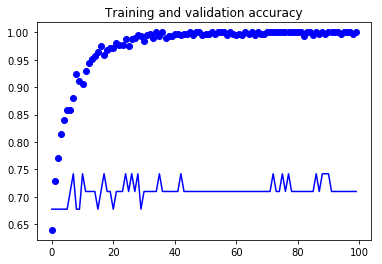

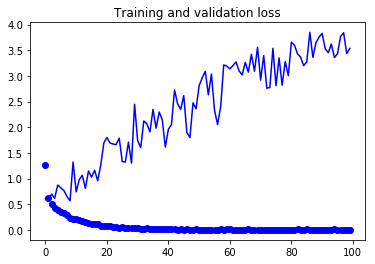

In [11]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [12]:
history = model.fit(train_features, train_labels, epochs=50, 
                    batch_size =5, 
                    validation_data=(validation_features, validation_labels))
history_dict = history.history
print(history_dict.keys())

model.save('damage_undamaged_conv3_2_vgg.h5')

Train on 394 samples, validate on 31 samples
Epoch 1/50
394/394 [==============================] - 1s - loss: 1.8251e-04 - acc: 1.0000 - val_loss: 3.5041 - val_acc: 0.7097
Epoch 2/50
394/394 [==============================] - 1s - loss: 0.0014 - acc: 1.0000 - val_loss: 3.7587 - val_acc: 0.7097
Epoch 3/50
394/394 [==============================] - 1s - loss: 0.0035 - acc: 1.0000 - val_loss: 3.5670 - val_acc: 0.7097
Epoch 4/50
394/394 [==============================] - 1s - loss: 0.0041 - acc: 0.9949 - val_loss: 3.5265 - val_acc: 0.7097
Epoch 5/50
394/394 [==============================] - 1s - loss: 0.0031 - acc: 0.9975 - val_loss: 3.6376 - val_acc: 0.7097
Epoch 6/50
394/394 [==============================] - 1s - loss: 9.8839e-04 - acc: 1.0000 - val_loss: 3.5112 - val_acc: 0.7097
Epoch 7/50
394/394 [==============================] - 1s - loss: 9.1969e-04 - acc: 1.0000 - val_loss: 3.5148 - val_acc: 0.7097
Epoch 8/50
394/394 [==============================] - 1s - loss: 1.5100e-04 - acc:

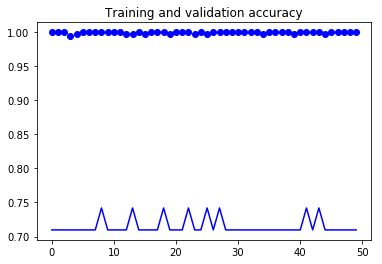

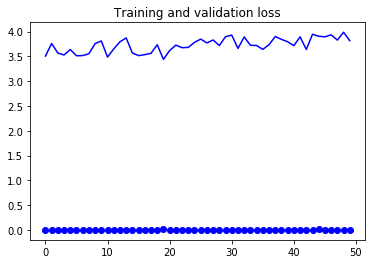

In [14]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()